# Test 1:
Is my interpolation wrong?

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("case1-input.txt", sep="\s+")
data.columns = ["radius", "number_density", "azimuthal_velocity", "temperature", "radial_electric_field"]
data.head()

,radius,number_density,azimuthal_velocity,temperature,radial_electric_field
0,0.000000,0.213281,0.000000e+00,0.000001,0.000000
1,0.000005,0.213299,-4.499460e-10,0.000001,0.000002
2,0.000010,0.213353,-3.598273e-09,0.000001,0.000004
3,0.000015,0.213444,-1.213689e-08,0.000001,0.000006
4,0.000020,0.213571,-2.874479e-08,0.000001,0.000008


In [2]:
r_step = data.radius[1] - data.radius[0]
r_step

5e-06

In [3]:
def get_row(r):
    row = r // r_step
    while (r < data.radius[row]):
        row -= 1
    return row

In [4]:
def get_interpolated(col, r):
    row = get_row(r)

    if (data.radius[row] == r):
        return col[row]

    w1 = r - data.radius[row]
    w2 = data.radius[row + 1] - r

    return (w1 * col[row] + w2 * col[row + 1]) / (w1 + w2);

In [5]:
# should be 5.5e-6
get_interpolated(data.radius, 5.5e-6)

9.5e-06

## Conclusion:
Yes, my weights were mixed up

## Fix

In [6]:
def get_interpolated_fixed(col, r):
    row = get_row(r)

    if (data.radius[row] == r):
        return col[row]

    w1 = data.radius[row + 1] - r
    w2 = r - data.radius[row]

    return (w1 * col[row] + w2 * col[row + 1]) / (w1 + w2);

In [7]:
# should be 5.5e-6
get_interpolated_fixed(data.radius, 5.5e-6)

5.5e-06

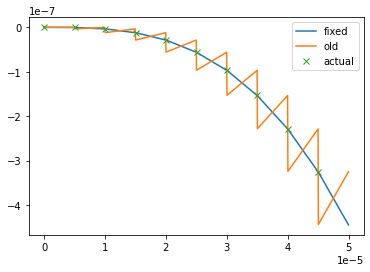

In [32]:
start = 0
span = 10
subspan = 100
col = data.azimuthal_velocity

stop = start + span

rs = np.linspace(data.radius[start], data.radius[stop], span*subspan) # test radii
ys = np.zeros_like(rs)
ys_old = np.zeros_like(rs)

for i in range(span*subspan):
    ys[i] = get_interpolated_fixed(col, rs[i])
    ys_old[i] = get_interpolated(col, rs[i])

# should be smooth plot
plt.plot(rs, ys)
plt.plot(rs, ys_old)
plt.plot(rs[::subspan], col[start:stop], 'x')
plt.legend(["fixed", "old", "actual"])
plt.show()

# Test 2:
Is my velocity wrong?